# Using HyperCollate in Kotlin Notebooks:

## Dependencies

To be able to use HyperCollate, use the following `@file` commands and imports to install the necessary dependencies, initialize HyperCollate and define some functions to display the HyperCollate graphs in the notebook:

In [1]:
@file:Repository("http://maven.huygens.knaw.nl/repository/")
@file:DependsOn("nl.knaw.huygens:hyper-collate-core:1.3.4-SNAPSHOT")
@file:DependsOn("nl.knaw.huygens:hyper-collate-jupyter:1.3.4-SNAPSHOT")

import nl.knaw.huygens.hypercollate.jupyter.*
import nl.knaw.huygens.hypercollate.model.*

HC.init()
fun VariantWitnessGraph.show(colored: Boolean = true, join: Boolean = true, emphasizeWhitespace: Boolean = false) = MIME(this.asSVGPair(colored, join, emphasizeWhitespace))
fun CollationGraph.asHTML() = HTML(this.asHTMLString())
fun CollationGraph.show(join: Boolean = true, emphasizeWhitespace: Boolean = false) = MIME(this.asSVGPair(join, emphasizeWhitespace))

Welcome to HyperCollate 1.3.4-SNAPSHOT
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



After this, you're ready to use HyperCollate:

## Import witnesses

There are 2 ways to import the XML of the witnesses you want to collate:

- Inline string:


In [2]:
val wA = HC.importXMLWitness("A", "<text>The dog's big eyes.</text>")
val wB = HC.importXMLWitness("B", "<text>The dog's <del>big black ears</del><add>brown eyes</add>.</text>")

 - From a File:

In [3]:
import java.io.File
val wC = HC.importXMLWitness("C",File("c.xml"))

The witnesses can be visualized as a graph using `.show()`

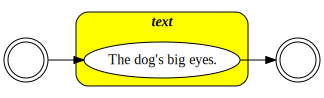

In [3]:
wA.show()

The `.show()` for witness graphs has several options:

 - colored : will use different colors for the different markup nodes (default: true)
 
 turning it off will produce a simpler graph:

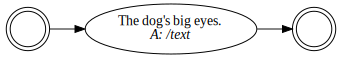

In [4]:
wA.show(colored=false)

 - join: will minimize the amount of nodes in the graph by joining tokens where possible. (default: true)
 
   Turn it off to see the individual tokens:

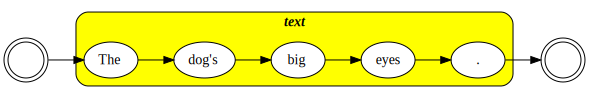

In [5]:
wA.show(join=false)

 - emphasizeWhitespace: visualize whitespace in the tokens (default: false)

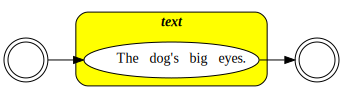

In [6]:
wA.show(emphasizeWhitespace=true)

## Collating the witnesses

In [7]:
val collationGraph = HC.collate(wA,wB)

The collationGraph can be visualized as an ASCII table:

In [8]:
collationGraph.asASCIITable()

┌───┬────┬──────┬──────────┬──────────┬────────┬─┐
│[A]│The │dog's │big       │eyes      │        │.│
├───┼────┼──────┼──────────┼──────────┼────────┼─┤
│[B]│    │      │[+]  brown│[+]   eyes│        │ │
│   │The │dog's │[-] big   │[-] black │[-] ears│.│
└───┴────┴──────┴──────────┴──────────┴────────┴─┘

As an HTML table:

In [9]:
collationGraph.asHTML()

A,The,dog's,big,eyes,,.
B,The,dog's,big brown,black eyes,ears,.


Or as a set of nodes and edges:

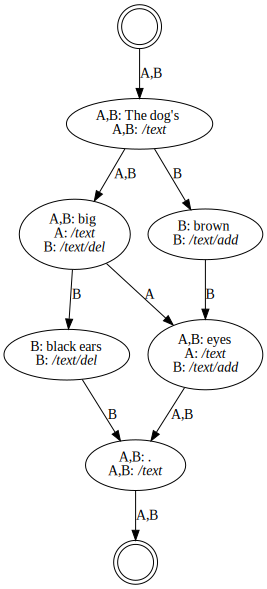

In [10]:
collationGraph.show()

This `.show()` also has the `join` and `emphasizeWhitespace` options mentioned above.